# Time Series Visualizer

For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:

- Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.
- Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
- Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.
- Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.
- Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

For each chart, make sure to use a copy of the data frame.

The boilerplate also includes commands to save and return the image.


In [37]:
import pandas as pd

In [36]:
df = pd.read_csv('fcc-forum-pageviews.csv')

In [34]:
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', index_col="date", parse_dates=True)

# Clean data

df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]


def draw_line_plot():
    
    # Draw line plot
    fig, ax = plt.subplots(figsize=(32, 10), dpi=100)
    
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    sns.lineplot(data=df, legend=False, palette=['r'])


    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month
    
    df_bar = df_bar.groupby(['year','month'])['value'].mean()
    
    df_bar = df_bar.unstack()
    df_bar.columns = ['January','February','March','April','May','June','July','August','September','October','November','December']
    
    # Draw bar plot
    fig = df_bar.plot(kind = 'bar', figsize = (15,10)).figure
  
    plt.xlabel('Years', fontsize = 15)
    plt.ylabel('Average Page Views', fontsize = 15)
    plt.legend(loc = 'upper left', title = 'Months', fontsize = 13)


    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig


def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 8))
    sns.boxplot(data = df_box, ax = ax1, x = "year", y = "value")
    ax1.set_title("Year-wise Box Plot (Trend)")
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Page Views")
                   
    sns.boxplot(data = df_box, ax = ax2, x = "month", y = "value")
    ax2.set_title("Month-wise Box Plot (Seasonality)")
    ax2.set_xlabel("Month")
    ax2.set_ylabel("Page Views")


    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig


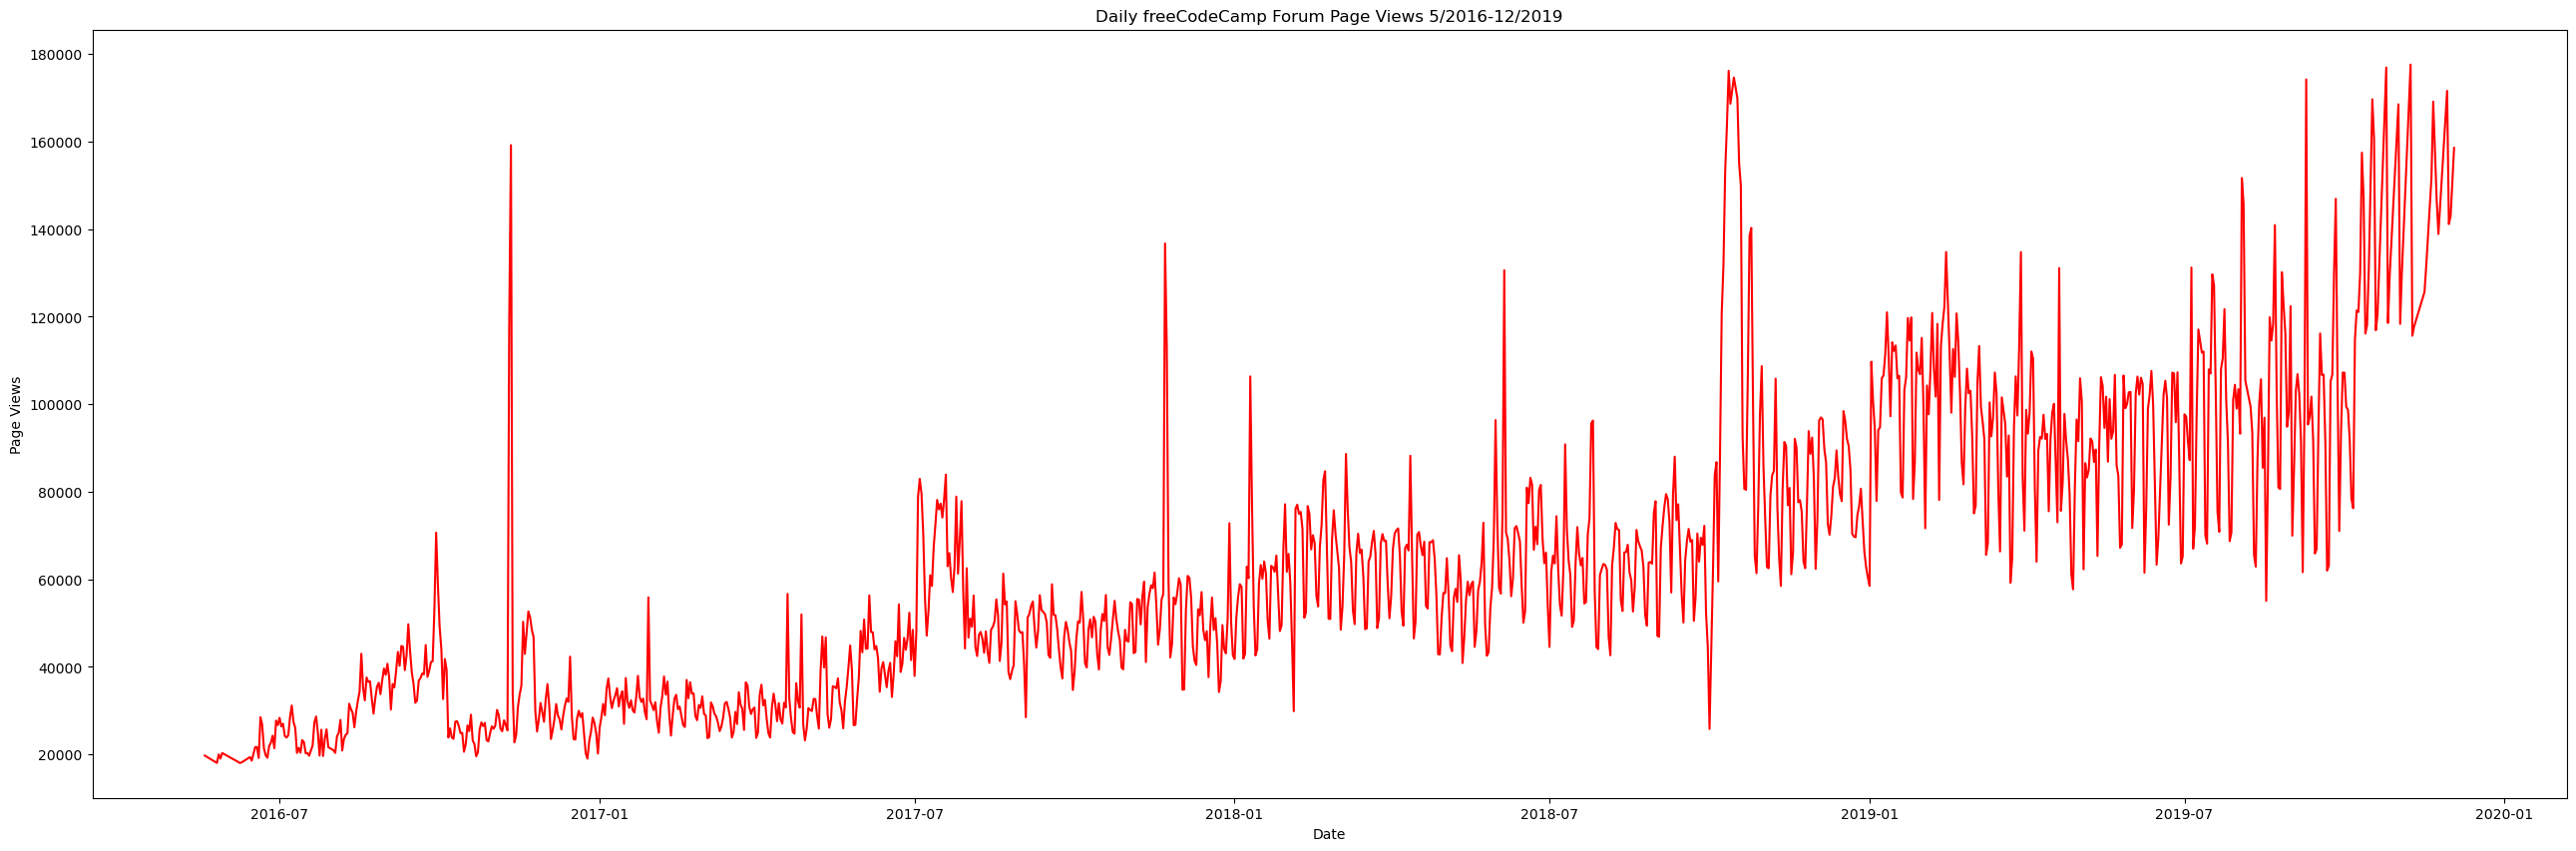

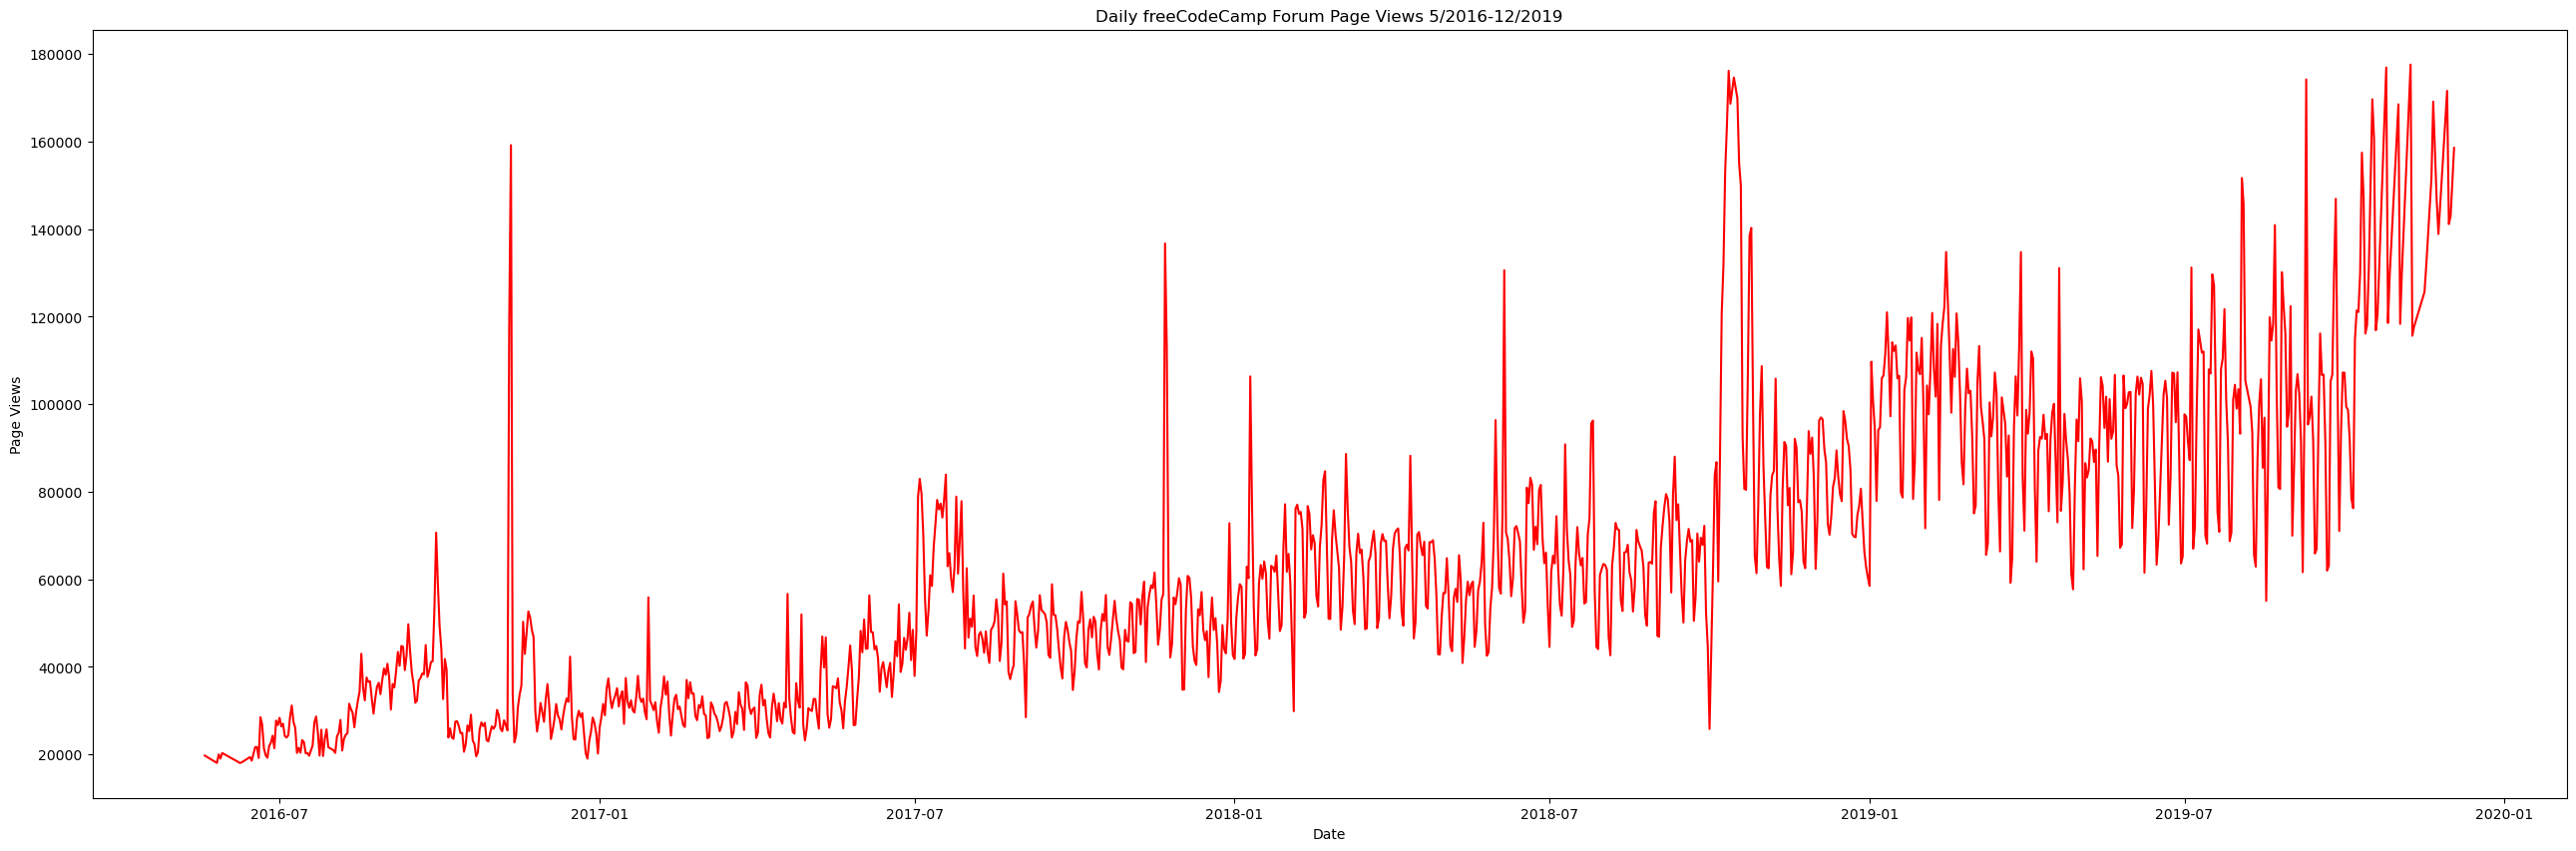

In [30]:
draw_line_plot()

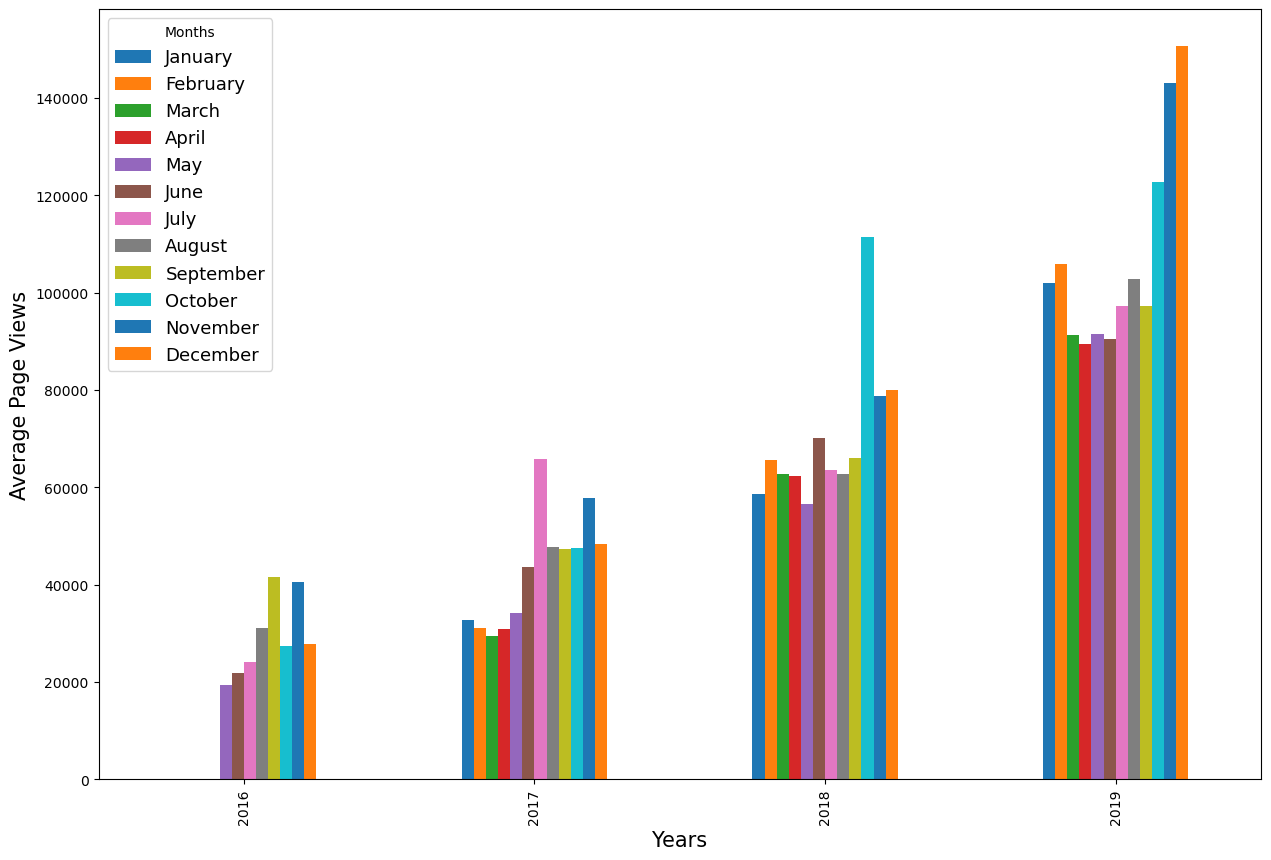

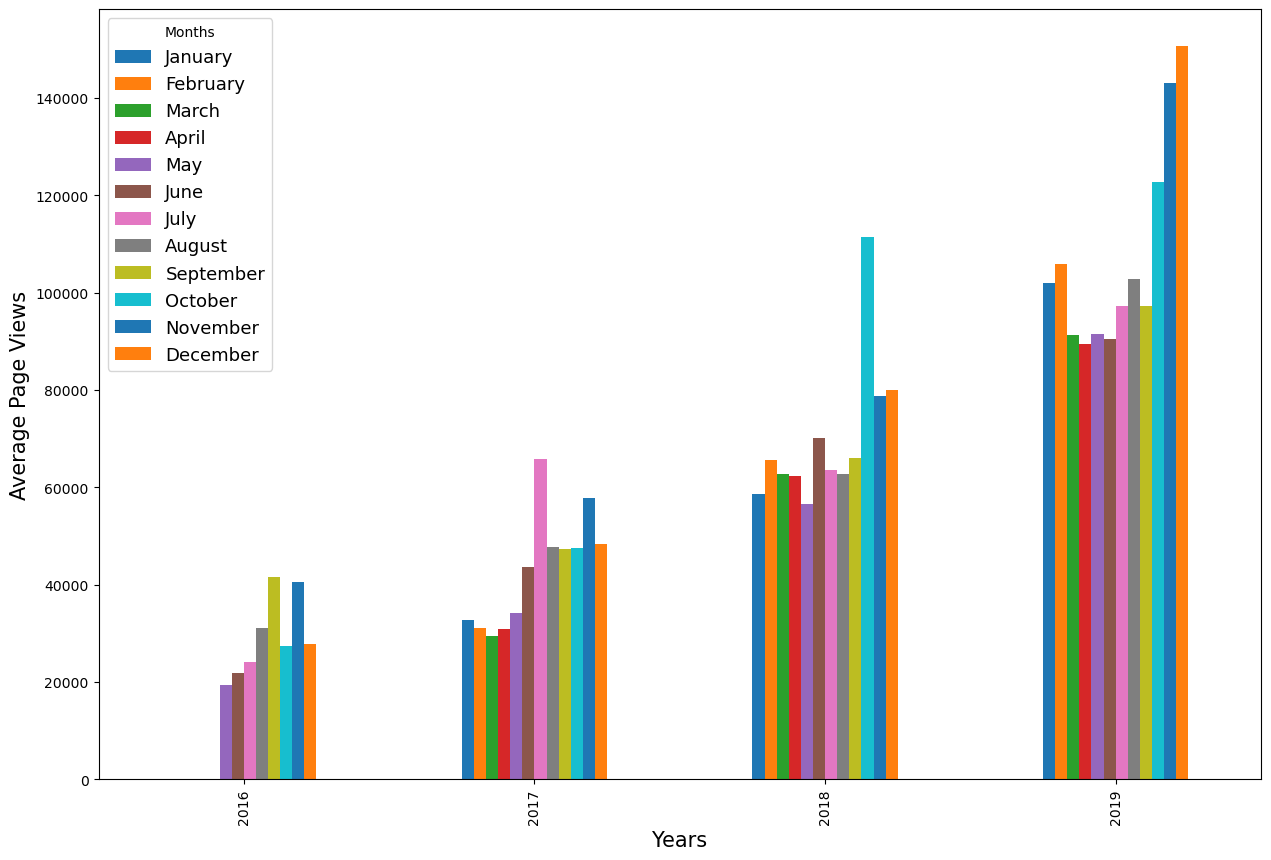

In [31]:
draw_bar_plot()

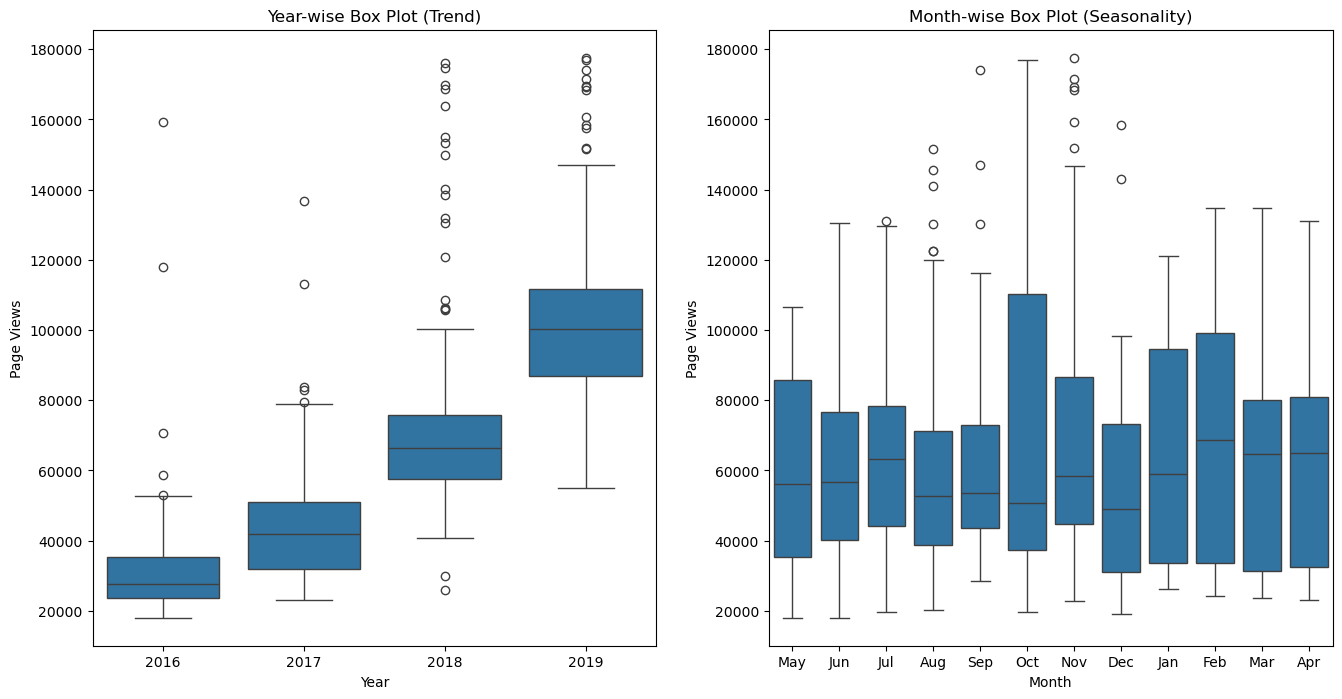

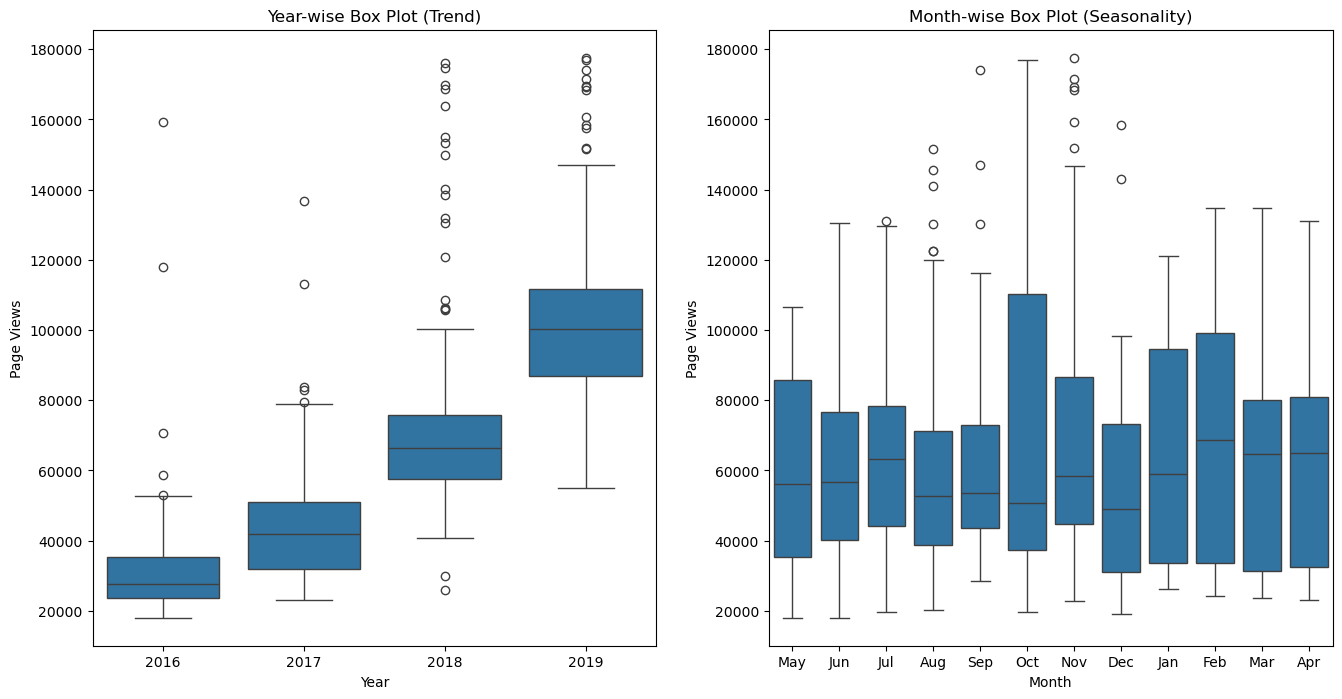

In [32]:
draw_box_plot()